## References
[1] NII Online display https://socr.umich.edu/HTML5/BrainViewer/  
[2] Introduction to Neuroimaging. https://miykael.github.io/nipype-beginner-s-guide/neuroimaging.html  
[3] Normalize images. https://miykael.github.io/nipype-beginner-s-guide/normalize.html  
[4] Nibabel. https://nipy.org/nibabel/gettingstarted.html  
[5] Radiological vs neurological conventions. https://nipy.org/nibabel/neuro_radio_conventions.html

## Process
   - Clean image
   - Normalize image
   - Check rotation

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
from nibabel.testing import data_path

### Load images

**NII files** are probably the most commonly-used format for multi-dimensional neuroimaging data. NIfTI is a raster format, with files generally containing at least 3-dimensional data: voxels, or pixels with a width, height, and depth. 

NIfTI files can be up to 7-dimensional: the first four dimensions are defined as 3 spatial dimensions and time, with the other dimensions used for "other stuff" -- though the time dimension is often to encode something other than time.  

Most packages also support reading gzip-compressed NIfTI files, which should have the extension .NII.gz.
The format is extensively supported and documented by the NIH.

**How 3D neuroimages are presented?**  
- 3 planes:
    - First plane: is the plane of the side - **sagittal** view
    - Second plane: is the plane looking from above - **axial** view **THIS IS THE IMPOTANT VIEW**
    - Third plane: is the plane of the face - **coronal**view 

<img src="brain_views.png">

In [2]:
alzheimer_img = nib.load("alzheimer_MR.nii")
healthy_img = nib.load("healthy_MR.nii")

In [3]:
alzheimer_img_data = alzheimer_img.get_fdata()
healthy_img_data = healthy_img.get_fdata()

In [4]:
alzheimer_img_data.shape

(256, 256, 124)

In [5]:
healthy_img_data.shape

(256, 256, 124)

In [12]:
alzheimer_img.affine

array([[  -0.9375    ,    0.        ,    0.        ,  120.        ],
       [   0.        ,    0.        ,   -1.5       ,   89.19999695],
       [   0.        ,    0.9375    ,    0.        , -153.9624939 ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [15]:
healthy_img.affine

array([[  -0.9375    ,    0.        ,    0.        ,  120.        ],
       [   0.        ,    0.        ,   -1.5       ,   91.09999847],
       [   0.        ,    0.9375    ,    0.        , -132.4624939 ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [14]:
hdr = alzheimer_img.header
hdr.get_xyzt_units()

('mm', 'sec')

### Visualize Axial View

In [6]:
def axial_plot(nii_img_data, length = 180):
    """ Function to display axial view of a NII image"""
    fig, axes = plt.subplots(figsize=(10,8))
    axes.imshow(nii_img_data[:, length, :].T, cmap="gray", origin="lower")

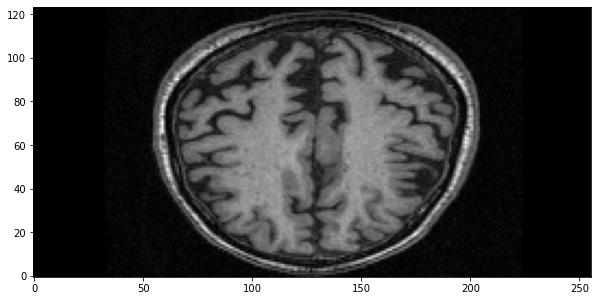

In [9]:
axial_plot(alzheimer_img_data, 180)
#plt.savefig('axial.png',dpi=3000, transparent=True)

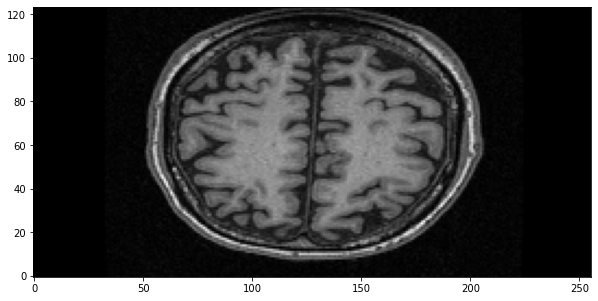

In [10]:
axial_plot(healthy_img_data, 180)

In [ ]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices), figsize = (10,8))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [ ]:
# Alzheimer
slice_0 = alzheimer_img_data[0, :, :]
slice_1 = alzheimer_img_data[:, 220, :]
slice_2 = alzheimer_img_data[:, :, 0]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image") ;

# Healthy
slice_0 = healthy_img_data[0, :, :]
slice_1 = healthy_img_data[:, 200, :]
slice_2 = healthy_img_data[:, :, 0]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image") ;

In [ ]:
def axial_plot(nii_img_data, length = 180):
    """ Function to display axial view of a NII image"""
    fig, axes = plt.subplots(figsize=(10,8))
    axes.imshow(nii_img_data[:, length, :].T, cmap="gray", origin="lower")

In [ ]:
axial_plot(alzheimer_img_data, 180)
plt.savefig('axial.png',dpi=3000, transparent=True)

In [ ]:
import pandas as pd

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
xml_str = '<?xml version="1.0" encoding="UTF-8"?>\n<ext:ClinicalAssessment ID="atropychallenge_E00830" project="MIRIAD" label="miriad_255_1_MMSE" xmlns:arc="http://nrg.wustl.edu/arc" xmlns:ext="http://nrg.wustl.edu/ext" xmlns:val="http://nrg.wustl.edu/val" xmlns:pipe="http://nrg.wustl.edu/pipe" xmlns:wrk="http://nrg.wustl.edu/workflow" xmlns:scr="http://nrg.wustl.edu/scr" xmlns:xdat="http://nrg.wustl.edu/security" xmlns:cat="http://nrg.wustl.edu/catalog" xmlns:prov="http://www.nbirn.net/prov" xmlns:xnat="http://nrg.wustl.edu/xnat" xmlns:xnat_a="http://nrg.wustl.edu/xnat_assessments" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://nrg.wustl.edu/workflow http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/schemas/pipeline/workflow.xsd http://nrg.wustl.edu/catalog http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/schemas/catalog/catalog.xsd http://nrg.wustl.edu/pipe http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/schemas/pipeline/repository.xsd http://nrg.wustl.edu/scr http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/schemas/screening/screeningAssessment.xsd http://nrg.wustl.edu/ext http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/schemas/ext/ext.xsd http://nrg.wustl.edu/arc http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/schemas/project/project.xsd http://nrg.wustl.edu/val http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/schemas/validation/protocolValidation.xsd http://nrg.wustl.edu/xnat http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/schemas/xnat/xnat.xsd http://nrg.wustl.edu/xnat_assessments http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/schemas/assessments/assessments.xsd http://www.nbirn.net/prov http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/schemas/birn/birnprov.xsd http://nrg.wustl.edu/security http://miriad.drc.ion.ucl.ac.uk/atrophychallenge/schemas/security/security.xsd">\n<xnat:subject_ID>atropychallenge_S00204</xnat:subject_ID>\n<xnat:age>60.54</xnat:age>\n<ext:Neuro>\n<ext:MMSE>18</ext:MMSE>\n<ext:CDR sumbox="4.0" rating="1.0"/>\n</ext:Neuro>\n</ext:ClinicalAssessment>'

In [ ]:
#xml_str = '<?xml version="1.0" encoding="utf-8"?>\n<response>\n <head>\n  <code>\n   200\n  </code>\n </head>\n <body>\n  <data id="0" name="All Categories" t="2018052600" tg="1" type="category"/>\n  <data id="13" name="RealEstate.com.au [H]" t="2018052600" tg="1" type="publication"/>\n </body>\n</response>'

etree = ET.fromstring(xml_str)
dfcols = ['subject_ID', 'age']
df = pd.DataFrame(columns=dfcols)

for i in etree.iter(tag='xnat.'):
    df = df.append(
        pd.Series([i.get('subject_ID'), i.get('age')], index=dfcols),
        ignore_index=True)

df.head()

In [ ]:
tree = ET.parse('test.xml')
root = tree.getroot()

In [ ]:
root.tag

In [ ]:
root.attrib

In [ ]:
for child in root:
    print(child.tag, child.attrib)

In [ ]:
root[0].text

In [ ]:
import xml.etree.ElementTree as et 

xtree = et.parse("test.xml")
xroot = xtree.getroot() 

df_cols = ["Subject_ID", "age"]
rows = []

for node in xroot: 
    Subject_ID = node.attrib.get("Subject_ID")
    age = node.attrib.get("age")
    rows.append({"Subject_ID": Subject_ID, "age": age})

out_df = pd.DataFrame(rows, columns = df_cols)

In [ ]:
out_df